02-regression Home Work

In [1]:
import pandas as pd

In [2]:
pd.__version__

'2.2.2'

In [3]:
!python -m wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv -o laptops.csv


Saved under laptops (3).csv


In [4]:
df = pd.read_csv("laptops.csv")

In [5]:
df.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [6]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [7]:
df.columns

Index(['laptop', 'status', 'brand', 'model', 'cpu', 'ram', 'storage',
       'storage_type', 'gpu', 'screen', 'touch', 'final_price'],
      dtype='object')

In [8]:
features = ['ram','storage','screen','final_price']

In [9]:
data = df[features]
data

,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01
...,...,...,...,...
2155,16,1000,17.3,2699.99
2156,16,1000,17.3,2899.99
2157,32,1000,17.3,3399.99
2158,16,1000,13.4,1899.99


In [11]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

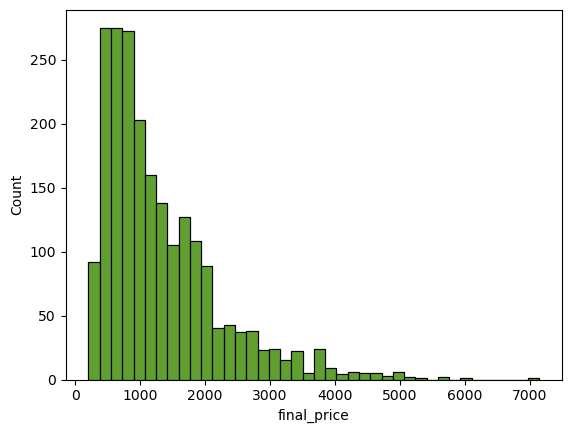

In [14]:
sns.histplot(data.final_price, bins=40)
plt.show()

In [10]:
data.isnull().sum()

ram            0
storage        0
screen         4
final_price    0
dtype: int64

In [15]:
data.ram.median()

16.0

Prepare and split the dataset

In [16]:
n = len(data)
n_val = int(0.2*n)
n_test = int(0.2*n)
n_train = n - (n_val + n_test)

In [18]:
import numpy as np

In [20]:
np.random.seed(42)
idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = data.iloc[idx]
df_shuffled

,ram,storage,screen,final_price
2079,32,1000,15.6,1123.29
668,4,64,14.1,201.05
2073,32,1000,14.0,997.74
1113,16,512,13.3,1016.00
788,32,1000,16.0,2739.00
...,...,...,...,...
1638,8,512,15.0,1838.29
1095,8,256,15.6,531.80
1130,8,256,13.3,765.33
1294,8,512,14.0,803.61


In [42]:
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [43]:
y_train = df_train.final_price.values
y_val = df_val.final_price.values
y_test = df_test.final_price.values

del df_train['final_price']
del df_val['final_price']
del df_test['final_price']

In [23]:
df_train = df_train.fillna(0)

In [24]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones,X])
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    return w[0], w[1:]

In [26]:
X_train = df_train.values
w_0, w = train_linear_regression(X_train, y_train)

In [27]:
y_pred = w_0 + X_train.dot(w)
y_pred

array([2377.35987681,  398.02076576, 2435.12627415, ..., 1255.89731808,
       1313.66371541, 1313.66371541])

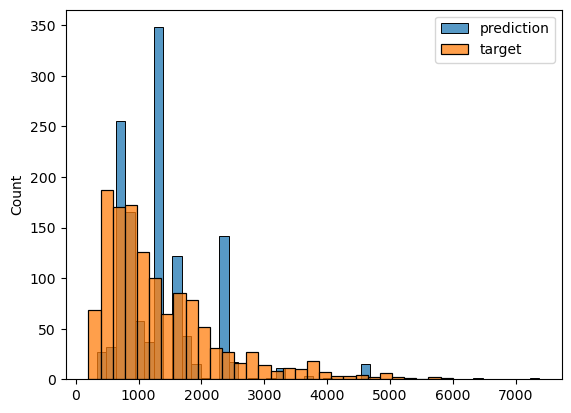

In [28]:
sns.histplot(y_pred, label='prediction')
sns.histplot(y_train, label='target')
plt.legend()
plt.show()

In [29]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error**2).mean()
    return np.sqrt(mse)

In [30]:
rmse(y_train,y_pred)

602.3920520606714

In [31]:
df_val = df_val.fillna(0)
X_val = df_val.values

y_pred = w_0 + X_val.dot(w)

rmse(y_val,y_pred)

597.3635593619621

In [37]:
df_train = df_train.fillna(df_train.screen.mean())
X_train = df_train.values

In [38]:
w_0, w = train_linear_regression(X_train, y_train)

In [39]:
y_pred = w_0 + X_train.dot(w)

rmse(y_train,y_pred)

3.9544697313528055e-11

In [41]:
df_val = df_val.fillna(df.screen.mean())
X_val = df_val.values

y_pred = w_0 + X_val.dot(w)

round(rmse(y_val,y_pred),2)

0.0

In [50]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    return w[0], w[1:]

In [51]:
df_train = df_train.fillna(0)
X_train = df_train.values

df_val = df_val.fillna(0)
X_val = df_val.values

In [53]:
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_val.dot(w)
    print('%6s' %r, round(rmse(y_val, y_pred),2))

     0 597.36
  0.01 597.36
   0.1 597.35
     1 597.21
     5 597.01
    10 597.06
   100 597.9


In [59]:
def prepare_X(df):
    df_num = df.fillna(0)
    X = df_num.values
    return X

In [60]:
rsme_res = []
for s in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    np.random.seed(s)
    idx = np.arange(n)
    np.random.shuffle(idx)

    df_shuffled = data.iloc[idx]
    df_shuffled

    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()

    y_train = df_train.final_price.values
    y_val = df_val.final_price.values
    y_test = df_test.final_price.values

    del df_train['final_price']
    del df_val['final_price']
    del df_test['final_price']

    X = prepare_X(df_train)
    w_0, w = train_linear_regression(X, y_train)
    X_val = prepare_X(df_val)
    y_pred = w_0 + X_val.dot(w)

    rsme_res.append(rmse(y_val, y_pred))
rsme_res

[565.4520868770995,
 636.7985423056726,
 588.955869790796,
 597.8148920012515,
 571.962791511103,
 573.238325661895,
 647.3438328407194,
 550.4398184485962,
 587.3335036169963,
 576.101792943313]

In [63]:
round(np.array(rsme_res).std(),3)

29.176

In [65]:
np.random.seed(9)
idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = data.iloc[idx]
df_shuffled

df_train_val = df_shuffled.iloc[:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

y_train = df_train_val.final_price.values
y_test = df_test.final_price.values

del df_train_val['final_price']
del df_test['final_price']

X = prepare_X(df_train_val)
w_0, w = train_linear_regression_reg(X, y_train, r=0.001)
X_test = prepare_X(df_test)
y_pred = w_0 + X_test.dot(w)

rmse(y_test, y_pred)

608.6099822049559